In [2]:
import os
import re
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = {}
columns_set = None
all_columns = set()

csv_files = glob.glob('metrics/[!final_]*.csv')
#csv_files = glob.glob('metrics_masked_lr/[!final_]*.csv')
for file in csv_files:
    model_name = file.split('/')[-1].split('.')[0].split("_")[-2]  # Extract model name from file name
    df = pd.read_csv(file)
    
    # Rename columns by removing underscore and following characters
    df.columns = [re.sub('_\\d', '', col) for col in df.columns]
    
    data[model_name] = df
    # Update columns_set with columns common to all DataFrames
    if columns_set is None:
        columns_set = set(df.columns)
    else:
        columns_set &= set(df.columns)
#    all_columns.append(set(df.columns)

Common columns ['auc', 'compile_metrics', 'epoch', 'loss', 'recall', 'step']


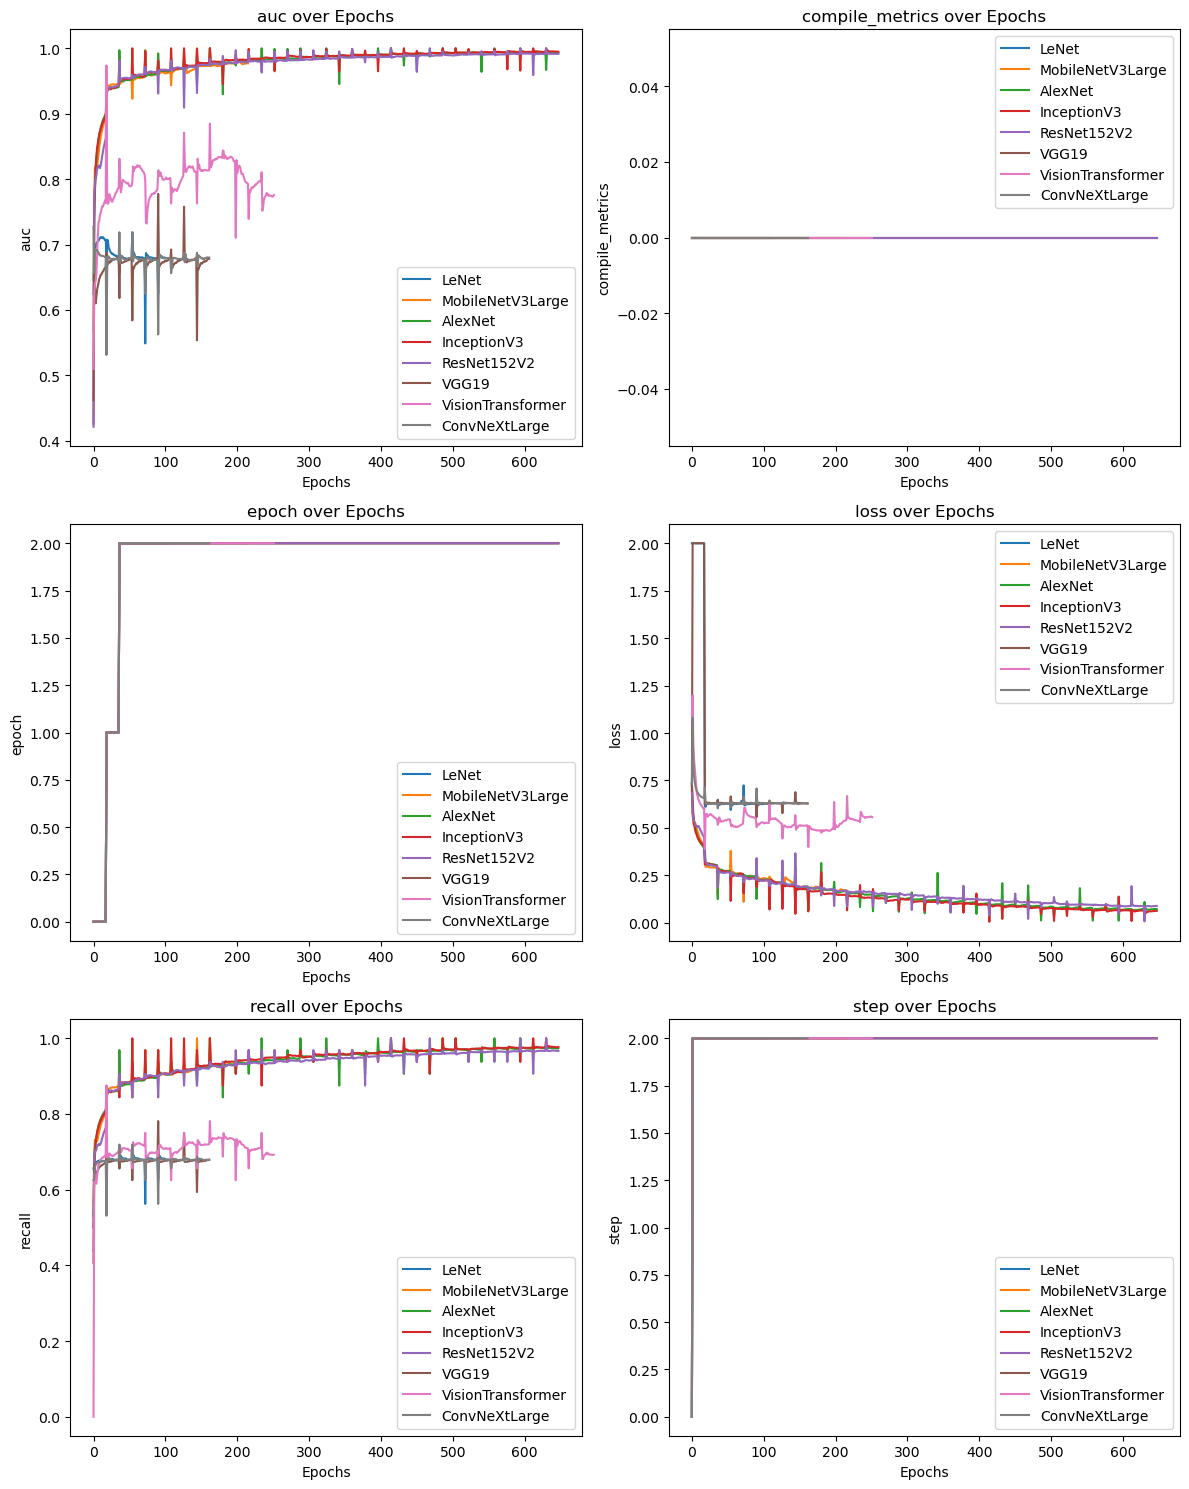

In [28]:
# Convert columns_set to a sorted list for consistency
columns_set -= set(['', "Unnamed: 0", 'lr', 'val_lr', 'binary_accuracy', 'val_binary_accuracy'])
common_columns = sorted(columns_set)

print("Common columns", common_columns)

# Create a subplot for each metric
num_metrics = len(common_columns)
fig, axes = plt.subplots(num_metrics // 2 +(1 if num_metrics % 2 != 0 else 0), 2, figsize=(12, 2.5 * num_metrics))
axes = axes.flatten()
if num_metrics == 1:
    axes = [axes]  # Ensure axes is iterable if there's only one metric

# Plot each metric
for i, metric in enumerate(common_columns):
    for model_name, df in data.items():
        df = df.clip(upper=2)
        #df = df.rolling(100).mean()
        sns.lineplot(data=df, x=df.index, y=metric, ax=axes[i], label=model_name)
    axes[i].set_title(f'{metric} over Epochs')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel(metric)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("out/figure/all_final.png")

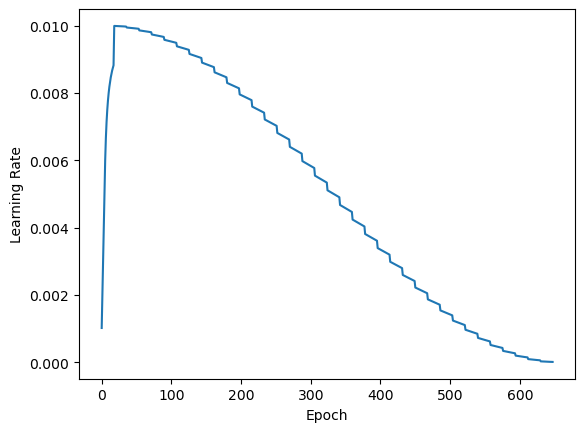

In [29]:
data["InceptionV3"]['lr'].plot(xlabel="Epoch", ylabel="Learning Rate")
plt.show()

In [18]:
summary = []
for name, df in data.items():
    max_values = df.max()
    min_values = df.min()
    summary.append({
        'Model': name,
        **{f'max_{col}': max_values[col] for col in df.columns if col in common_columns and 'loss' not in col},
        **{f'min_{col}': min_values[col] for col in df.columns if 'loss' in col},
    })

summary_df = pd.DataFrame(summary)

In [19]:
summary_df

,Model,max_auc,max_recall,max_val_auc,max_val_recall,min_loss,min_val_loss
0,InceptionV3,0.994634,0.976548,0.994129,0.972713,0.063232,0.072143
1,MobileNetV3Large,0.977276,0.933162,0.964436,0.909779,0.170123,0.223358
2,ConvNeXtLarge,0.680838,0.678743,0.678864,0.678864,0.628728,0.628055
3,ResNet152V2,0.991548,0.966747,0.990218,0.965457,0.088757,0.094941
4,AlexNet,0.993728,0.973503,0.993252,0.970820,0.071493,0.079116
5,LeNet,0.707212,0.678743,0.705343,0.678864,0.628083,0.606760
6,VGG19,0.678899,0.678743,0.678864,0.678864,0.628003,0.627817
7,VisionTransformer,0.831360,0.734450,0.850943,0.751420,0.488758,0.462276


In [20]:
summary_df.to_latex(float_format="%.4f")

'\\begin{tabular}{llrrrrrr}\n\\toprule\n & Model & max_auc & max_recall & max_val_auc & max_val_recall & min_loss & min_val_loss \\\\\n\\midrule\n0 & InceptionV3 & 0.9946 & 0.9765 & 0.9941 & 0.9727 & 0.0632 & 0.0721 \\\\\n1 & MobileNetV3Large & 0.9773 & 0.9332 & 0.9644 & 0.9098 & 0.1701 & 0.2234 \\\\\n2 & ConvNeXtLarge & 0.6808 & 0.6787 & 0.6789 & 0.6789 & 0.6287 & 0.6281 \\\\\n3 & ResNet152V2 & 0.9915 & 0.9667 & 0.9902 & 0.9655 & 0.0888 & 0.0949 \\\\\n4 & AlexNet & 0.9937 & 0.9735 & 0.9933 & 0.9708 & 0.0715 & 0.0791 \\\\\n5 & LeNet & 0.7072 & 0.6787 & 0.7053 & 0.6789 & 0.6281 & 0.6068 \\\\\n6 & VGG19 & 0.6789 & 0.6787 & 0.6789 & 0.6789 & 0.6280 & 0.6278 \\\\\n7 & VisionTransformer & 0.8314 & 0.7344 & 0.8509 & 0.7514 & 0.4888 & 0.4623 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [23]:
data_final = {}
columns_set = None
all_columns = set()

csv_files = glob.glob('metrics/final_*.csv')
#csv_files = glob.glob('metrics/[!final_]*.csv')
for file in csv_files:
    model_name = file.split('/')[-1].split('.')[0].split("_")[-2]  # Extract model name from file name
    df = pd.read_csv(file)
    
    # Rename columns by removing underscore and following characters
    df.columns = [re.sub('_\\d', '', col) for col in df.columns]
    
    data[model_name] = df
    # Update columns_set with columns common to all DataFrames
    if columns_set is None:
        columns_set = set(df.columns)
    else:
        columns_set &= set(df.columns)
#    all_columns.append(set(df.columns)

Common columns ['auc', 'binary_accuracy', 'loss', 'lr', 'recall', 'val_auc', 'val_binary_accuracy', 'val_loss', 'val_lr', 'val_recall']


ValueError: Could not interpret value `lr` for `y`. An entry with this name does not appear in `data`.

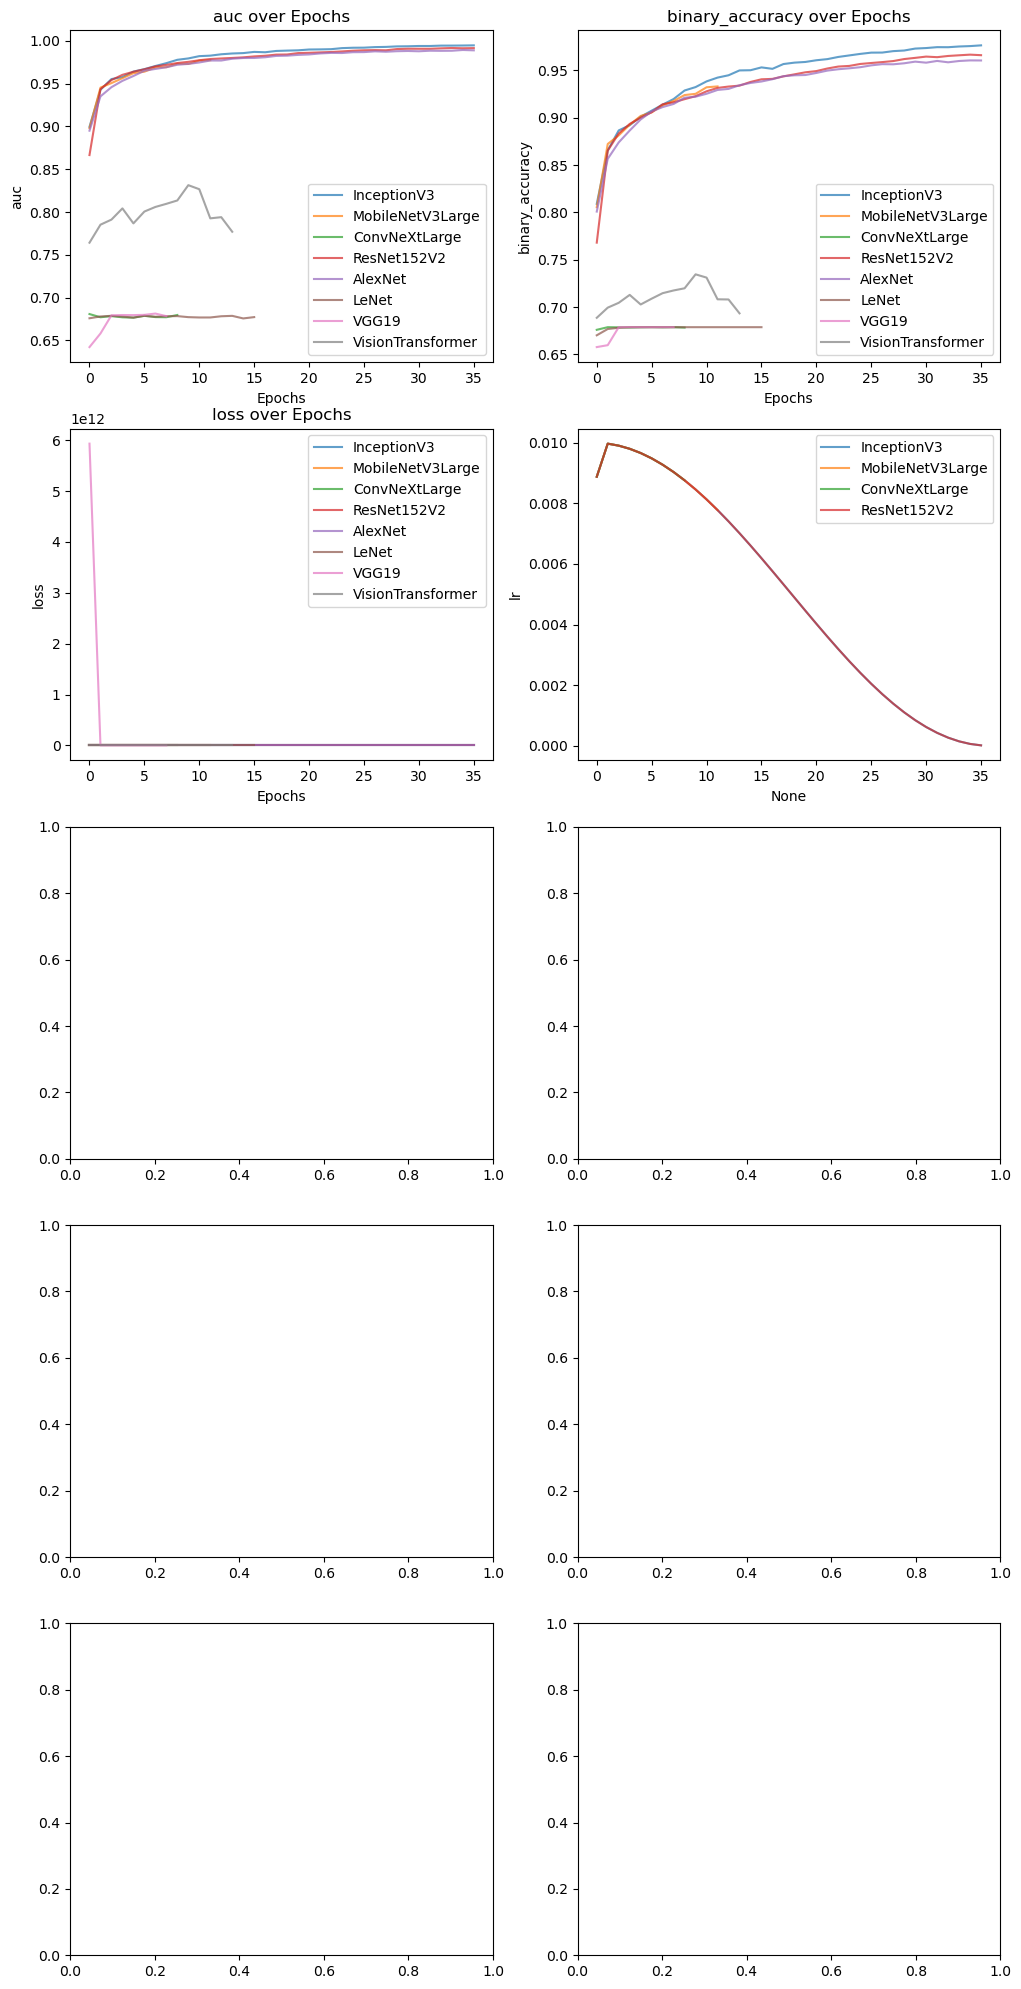

In [11]:
# Convert columns_set to a sorted list for consistency
columns_set -= set(['', "Unnamed: 0", 'lr', 'val_lr', 'binary_accuracy', 'val_binary_accuracy'])
common_columns = sorted(columns_set)

print("Common columns", common_columns)

# Create a subplot for each metric
num_metrics = len(common_columns)
fig, axes = plt.subplots(num_metrics // 2 +(1 if num_metrics % 2 != 0 else 0), 2, figsize=(12, 2.5 * num_metrics))
axes = axes.flatten()
if num_metrics == 1:
    axes = [axes]  # Ensure axes is iterable if there's only one metric

# Plot each metric
for i, metric in enumerate(common_columns):
    for model_name, df in data.items():
        #df = df.rolling(100).mean()
        sns.lineplot(data=df, x=df.index, y=metric, ax=axes[i], label=model_name, alpha=.7)
    axes[i].set_title(f'{metric} over Epochs')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel(metric)
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("out/figure/all_train.png")

In [12]:
columns_set -= set(["loss", "val_loss"])
# Step 1: Calculate the mean of each DataFrame
max_values = {key: df[sorted(list(columns_set))].max() for key, df in data.items()}
max_df = pd.DataFrame(max_values).T
max_df.to_latex(float_format="%.4f")

KeyError: "['lr', 'val_lr'] not in index"

In [13]:
for name, df in data.items():
    print(name)
    print(df.max())

InceptionV3
Unnamed: 0             35.000000
auc                     0.994634
binary_accuracy         0.976548
loss                    0.397134
lr                      0.009969
recall                  0.976548
val_auc                 0.994129
val_binary_accuracy     0.972713
val_loss                0.607527
val_lr                  0.009989
val_recall              0.972713
dtype: float64
MobileNetV3Large
Unnamed: 0             11.000000
auc                     0.977276
binary_accuracy         0.933162
loss                    0.398141
lr                      0.009969
recall                  0.933162
val_auc                 0.964436
val_binary_accuracy     0.909779
val_loss               75.758308
val_lr                  0.009989
val_recall              0.909779
dtype: float64
ConvNeXtLarge
Unnamed: 0             8.000000
auc                    0.680838
binary_accuracy        0.678743
loss                   0.655181
lr                     0.009969
recall                 0.678743
val_auc  

# Plot instance segmentation

FileNotFoundError: [Errno 2] No such file or directory: 'out/yolo_synthetic'